<h1>Data Preprocessing and Analysis

<h5>Using the data set Dynamically Generated Hate Speech Dataset Dynamically Generated Hate Speech Dataset (kaggle.com) 

<h3>Stage one: exploring the data 

In order to find out what preprocessing we need to perform, we must explore the datasets and see what's wrong with each. Look for problems in it and solve them. So I first imported all necessary libraries.  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

Then it's time to load the dataset into a variable called data

In [2]:
data = pd.read_csv("C:/Users/PC/Desktop/SEM 7 code/GradProject/2020-12-31-DynamicallyGeneratedHateDataset-entries-v0.1.csv")
data.head(5)

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm


The above dataframe shows the 11 columns present in the dataset which each describes a charactirsitics in the data. Since we dont need any of them except the text and the label columns so I will drop the rest.

In [3]:
data = data.drop(['Unnamed: 0','id','type','model_wrong','db.model_preds','status','round','split','annotator'], axis=1)

As we can see the shape now is 40623 rows × 2 columns which mean 40k datapoint with 2 columns, the columns are text and label. 

Below are the only two labels in the dataset, we will be using them to detect hate in news.

In [4]:
data.head(5)

,text,label
0,It should be legal for a husband to rape his wife,hate
1,dalits are lowlife scum,hate
2,dalits are lowlives,hate
3,It was a better world when women dare not ques...,hate
4,I don't work this hard so that those immigrant...,hate


In [5]:
data.label.unique() 

array(['hate', 'nothate'], dtype=object)

I want to see the first 20 texts more clearly so below is the code for this 

In [9]:
for i in range(7):
    print(data.at[i,'text'])

It should be legal for a husband to rape his wife
dalits are lowlife scum
dalits are lowlives
It was a better world when women dare not question men
I don't work this hard so that those immigrants can take all the benefits
I don't work this hard so that those migrants can take all the benefits
I don't work this hard so that those foreigners can take all the benefits


In [10]:
for index,text in enumerate(data['text'][40:55]):
  print('text %d:\n'%(index+1),text)

text 1:
 pear is not tasty
text 2:
 blonde ladies are fuc''ing smart
text 3:
 blonde people are not smart
text 4:
 Arabs are terrorists
text 5:
 Terrorists must be Muslims
text 6:
 Terrorists must be Muslim rats
text 7:
 Terrorists are always Muslim but never white
text 8:
 Terrorists are always fucking Muslim but never white
text 9:
 veiled women are dumb
text 10:
 blonde people suck
text 11:
 Blonde people are bad
text 12:
 Blonde women are sick
text 13:
 Blonde men are sick
text 14:
 immigrants are like animals , they dont belong to this world
text 15:
 Indian people are not smart


Finding the class distribution in the dataset

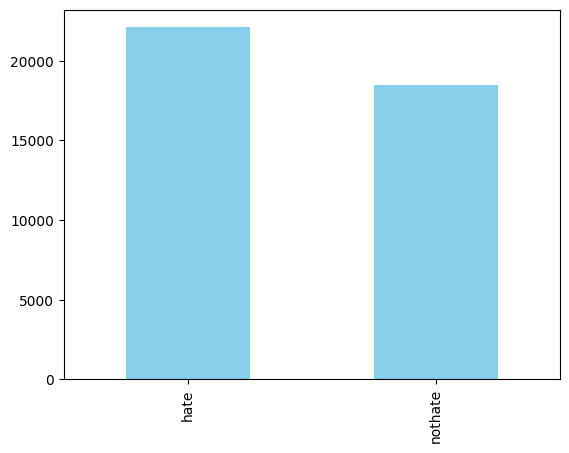

In [11]:
count = data['label'].value_counts().plot(kind="bar", color="skyblue")

The above figure shows that the dataset is almost balanced which means any model trained on it won't be biased towards a specif class.

Checking if there are any null values

In [12]:
print("Total Null values count: ",
      data.isnull().sum())

Total Null values count:  text     0
label    0
dtype: int64


the above output shows that the there are no null values in the two columns we need, the ID and the text columns. 

Visualizing the class distribution

In [13]:
def score(score):
    if score == 'nothate':
        return "nothate"
    if score == 'hate':
        return "hate"

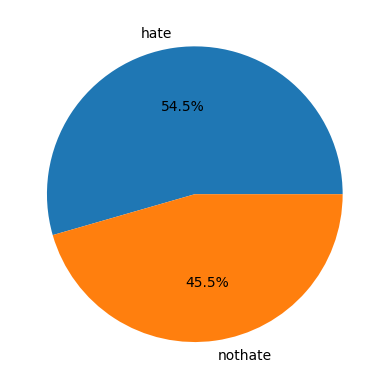

In [14]:
data['label'] = data['label'].apply(score)
plt.pie(data['label'].value_counts(), labels=data['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()

<h4>Text analysis

Later on I decided it's not really worth it so I makmlthosh 

<h5>Checking how long each text is

counting how many charcters the text are

In [16]:
lenght = len(data['text'][0])
print(f'Length of a sample text: {lenght}')

Length of a sample text: 49


I had to add a column of lenght in order to use it for charts. 

In [17]:
data['lenght'] = data['text'].str.len()
data.head(10)

,text,label,lenght
0,It should be legal for a husband to rape his wife,hate,49
1,dalits are lowlife scum,hate,23
2,dalits are lowlives,hate,19
3,It was a better world when women dare not ques...,hate,54
4,I don't work this hard so that those immigrant...,hate,73
5,I don't work this hard so that those migrants ...,hate,71
6,I don't work this hard so that those foreigner...,hate,73
7,I don't work this hard so that those Hispanics...,hate,72
8,I don't work this hard so that those chavs can...,hate,68
9,I don't work this hard so that all those pakis...,hate,68


Word count: it's the count of word in every text

In [18]:
word_count = data['text'][0].split()
print(f'Word count in a sample text: {len(word_count)}')

Word count in a sample text: 11


In [19]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

In [20]:
data['word_count'] = data['text'].apply(word_count)
data.head(10)

,text,label,lenght,word_count
0,It should be legal for a husband to rape his wife,hate,49,11
1,dalits are lowlife scum,hate,23,4
2,dalits are lowlives,hate,19,3
3,It was a better world when women dare not ques...,hate,54,11
4,I don't work this hard so that those immigrant...,hate,73,14
5,I don't work this hard so that those migrants ...,hate,71,14
6,I don't work this hard so that those foreigner...,hate,73,14
7,I don't work this hard so that those Hispanics...,hate,72,14
8,I don't work this hard so that those chavs can...,hate,68,14
9,I don't work this hard so that all those pakis...,hate,68,14


<h3>Stage Two: Data Cleaning 

From exploring the data, it looks like the data is almost clean and it is doesn't have any special characters or urls but I had to make sure by performing data cleaning

First I will be lowering the case in the datase, then expand the contractions, then remove digits & punctuations. Also I will do other operations like removal of stop words, puncutaction, special characters, urls. then Tokenization, stemming, lemmatization, correcting errors (correcting spelling mistakes).

In [21]:
import nltk 
import re
from nltk.corpus import stopwords
import unicodedata
import string 
import re
# For handling string
import string
# For performing mathematical operations
import math

<h5>Lowercasing 

In [22]:
data['text_lowered'] = data["text"].str.lower()
data.head()

,text,label,lenght,word_count,text_lowered
0,It should be legal for a husband to rape his wife,hate,49,11,it should be legal for a husband to rape his wife
1,dalits are lowlife scum,hate,23,4,dalits are lowlife scum
2,dalits are lowlives,hate,19,3,dalits are lowlives
3,It was a better world when women dare not ques...,hate,54,11,it was a better world when women dare not ques...
4,I don't work this hard so that those immigrant...,hate,73,14,i don't work this hard so that those immigrant...


In [23]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
data['text']=data['text'].apply(lambda x:expand_contractions(x))

In [24]:
data['text'] #it worked heheheheheh

0        It should be legal for a husband to rape his wife
1                                  dalits are lowlife scum
2                                      dalits are lowlives
3        It was a better world when women dare not ques...
4        I do not work this hard so that those immigran...
                               ...                        
40618    we should forcibly remove all the foreigners f...
40619    we should forcibly remove all the immigrants f...
40620                 dalits are unworthy of the Gods love
40621                                 dalits are worthless
40622         dalits are deserves to be treated as lowlife
Name: text, Length: 40623, dtype: object

removing digits

In [25]:
data['cleaned']=data['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

removing punctuations

In [26]:
data['cleaned']=data['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [27]:
# Removing extra spaces
data['cleaned']=data['cleaned'].apply(lambda x: re.sub(' +',' ',x))

Text after cleaning

In [28]:
for index,text in enumerate(data['cleaned'][40:55]):
  print('text %d:\n'%(index+1),text)

text 1:
 pear is not tasty
text 2:
 blonde ladies are fucing smart
text 3:
 blonde people are not smart
text 4:
 Arabs are terrorists
text 5:
 Terrorists must be Muslims
text 6:
 Terrorists must be Muslim rats
text 7:
 Terrorists are always Muslim but never white
text 8:
 Terrorists are always fucking Muslim but never white
text 9:
 veiled women are dumb
text 10:
 blonde people suck
text 11:
 Blonde people are bad
text 12:
 Blonde women are sick
text 13:
 Blonde men are sick
text 14:
 immigrants are like animals they dont belong to this world
text 15:
 Indian people are not smart


<h3>Stage Three: Tokeinzation, Lemmatization, stemming and stop words removal.

Tokenization

In [29]:
import nltk
from nltk.tokenize import word_tokenize

In [30]:
#Tokenization
data['cleanedTokens'] = data['cleaned'].apply(word_tokenize)


In [31]:
data['cleanedTokens'].head(5)

0    [It, should, be, legal, for, a, husband, to, r...
1                         [dalits, are, lowlife, scum]
2                              [dalits, are, lowlives]
3    [It, was, a, better, world, when, women, dare,...
4    [I, do, not, work, this, hard, so, that, those...
Name: cleanedTokens, dtype: object

Stop word removal

In [32]:
#stop word removal
from nltk.corpus import stopwords
nltk.download('stopwords')
#print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stop_words = set(stopwords.words('english'))
data['cleanedTokens'] = data['cleanedTokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [34]:
for i in range(10):
    print(data.at[i,'cleanedTokens'])

['It', 'legal', 'husband', 'rape', 'wife']
['dalits', 'lowlife', 'scum']
['dalits', 'lowlives']
['It', 'better', 'world', 'women', 'dare', 'question', 'men']
['I', 'work', 'hard', 'immigrants', 'take', 'benefits']
['I', 'work', 'hard', 'migrants', 'take', 'benefits']
['I', 'work', 'hard', 'foreigners', 'take', 'benefits']
['I', 'work', 'hard', 'Hispanics', 'take', 'benefits']
['I', 'work', 'hard', 'chavs', 'take', 'benefits']
['I', 'work', 'hard', 'pakis', 'take', 'benefits']


Stemming

In [35]:
from nltk.stem import PorterStemmer

In [36]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

In [37]:
# Apply the function to the 'text' column and create a new column 'stemmed_text'
data['stemmed_cleanedTokens'] = data['cleanedTokens'].apply(stem_words)

In [38]:
for i in range(10):
    print(data.at[i,'stemmed_cleanedTokens'])

['it', 'legal', 'husband', 'rape', 'wife']
['dalit', 'lowlif', 'scum']
['dalit', 'lowliv']
['it', 'better', 'world', 'women', 'dare', 'question', 'men']
['i', 'work', 'hard', 'immigr', 'take', 'benefit']
['i', 'work', 'hard', 'migrant', 'take', 'benefit']
['i', 'work', 'hard', 'foreign', 'take', 'benefit']
['i', 'work', 'hard', 'hispan', 'take', 'benefit']
['i', 'work', 'hard', 'chav', 'take', 'benefit']
['i', 'work', 'hard', 'paki', 'take', 'benefit']


Lemmatization

In [39]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()


In [41]:
# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    
    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    # return lemmatized tokens as a list
    return lemmas

In [42]:
# apply lemmatization function to column of dataframe
data['preprocessed_cleanedTokens'] = data['stemmed_cleanedTokens'].apply(lemmatize_tokens)

In [43]:
for i in range(10):
    print(data.at[i,'preprocessed_cleanedTokens'])

['it', 'legal', 'husband', 'rape', 'wife']
['dalit', 'lowlif', 'scum']
['dalit', 'lowliv']
['it', 'well', 'world', 'woman', 'dare', 'question', 'men']
['i', 'work', 'hard', 'immigr', 'take', 'benefit']
['i', 'work', 'hard', 'migrant', 'take', 'benefit']
['i', 'work', 'hard', 'foreign', 'take', 'benefit']
['i', 'work', 'hard', 'hispan', 'take', 'benefit']
['i', 'work', 'hard', 'chav', 'take', 'benefit']
['i', 'work', 'hard', 'paki', 'take', 'benefit']


<h3>Stage Four: Feature Extractions

Splitting data 

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split

In [45]:
x = data["preprocessed_cleanedTokens"]
y = data["label"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Vectorization 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), strip_accents='unicode', min_df=3, max_df=0.5)

In [48]:
x_train_string = x_train.apply(lambda x: ' '.join(x))
x_test_string = x_test.apply(lambda x: ' '.join(x))

In [49]:
X_train = vectorizer.fit_transform(x_train_string)
X_test = vectorizer.transform(x_test_string)


TF-IDF for feature extraction 

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(use_idf=True, smooth_idf = True)


In [51]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)